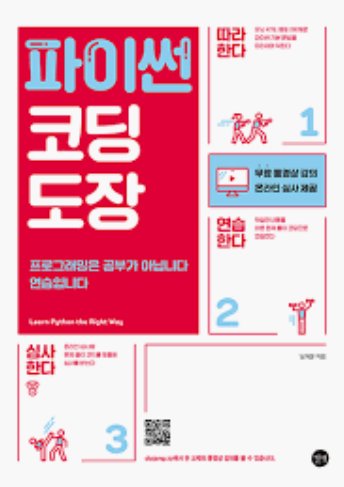

----
  -  본 노트북은 본 과목의 부교재인 "코딩도장" 33과 "클로져 사용하기"와 42과 "데코레이터 사용하기"를 원전으로 하고 "슬기로운 파이썬 트릭" 중에서 "데코레이터의 힘"으로 내용을 일부 보완하여 쥬피터 노트북으로 만들었음을 알려드립니다.(예제 코드는 일부 수정) 
  - 파이썬에서 데코레이션 부문이 제일 고난의 언덕(깔딱 고개)이라 별도의 강의 자료와 코드를 분리하는 것보다 하나의 노트북으로 만들어 놓고 이해하고 실습하는 것이 장기적으로 좋은 방법이라고 판단하여 예시를 만들어 보았습니다.(교재는 저처럼 반드시 구매하셔야 합니다.) 
  - 여러분도 이런 방법으로 자신이 필요로하는 또는 부족한 파이썬 파트를 자신 만의 노트북으로 만들어 놓고 복습하시는 방법이 새로운 언어를 보다 짥은 시간에 정복하는 길이라 믿습니다. 
----

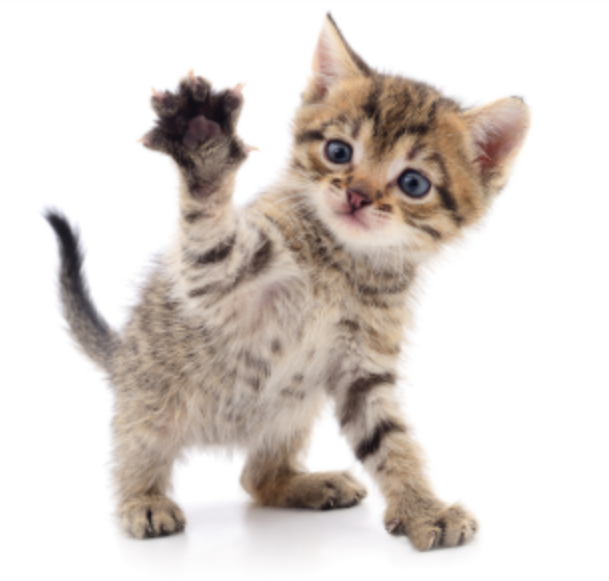

----
#### 01. 변수의 사용 범위 알아보기
  - 이제부터 파이썬의 사용자 정의 함수를 클로저(closure) 형태로 만드는 방법을 알아보겠습니다.
  - 참고로 클로저는 다소 어려울 수가 있으므로 변수의 사용 범위(scope, namespace)부터 알아본 뒤에 살펴보도록 하겠습니다.
----

  * 파이썬 스크립트에서 변수를 만들면 다음과 같이 함수 안에서도 사용할 수 있습니다.

In [173]:
def foo():
    print(x)  # 전역변수 x

x = 100       # 전역변수 x

foo()
print(x)      # 전역변수 x

100
100


  * foo 함수에서 함수 바깥에 있는 변수 x의 값을 출력했습니다. 
  * 물론 함수 바깥에서도 x의 값을 출력할 수 있습니다. 
  * 이처럼 함수를 포함하여 스크립트 전체에서 접근할 수 있는 변수를 
  * 전역 변수(global variable)라고 부릅니다. 
  * 특히 전역 변수에 접근할 수 있는 범위를 **전역 범위**(global scope)라고 합니다.

  * 그럼 변수 y를 함수 foo 안에서 만들면 어떻게 될까요?
  * 참고로 노트북은 모든 셀에 x를 이미 전역 변수로 사용하여 대신 y를 사용하였습니다. 

In [175]:
def foo():
    y = 10      # foo의 지역 변수 y
    print(y)    # foo의 지역 변수 y 출력
    
foo()
print(y)        # 에러. 함수 foo의 지역 변수 y는 출력할 수 없음

10


NameError: name 'y' is not defined

  * 실행을 해보면 y가 정의되지 않았다는 에러가 발생합니다. 
  * 왜냐하면 변수 y는 함수 foo 안에서 만들었기 때문에 foo의 지역 변수(local variable)입니다. 
  * 따라서 지역 변수는 변수를 만든 함수 안에서만 접근할 수 있고, 
  * 함수 바깥에서는 접근할 수 없습니다. 
  * 특히 지역 변수를 접근할 수 있는 범위를 지역 범위(local scope)라고 합니다.

#### 함수 안에서 전역변수 변경하기
  * 만약 함수 안에서 전역 변수의 값을 변경하면 어떻게 될까요?

In [177]:
x = 100          # 전역 변수 x
def foo():
    x = 200      # x는 함수 foo의 지역 변수
    print(x)     # 함수 foo의 지역 변수 x 출력

foo()
print(x)         # 전역 변수 x 출력

200
100


  * 분명 함수 foo 안에서 x = 200처럼 x의 값을 200으로 변경했습니다. 
  * 하지만 함수 바깥에서 print로 x의 값을 출력해보면 100이 나옵니다. 
  * 겉으로 보기에는 foo 안의 x는 전역 변수인 것 같지만 실제로는 foo의 지역 변수입니다. 
  * 즉, 전역 변수 x가 있고, foo에서 지역 변수 x를 새로 만들게 됩니다. 
  * 이 둘은 이름만 같을 뿐 서로 다른 변수입니다.<font color="red">(아주 중요)
  * 함수 안에서 전역 변수의 값을 변경하려면 global 키워드를 사용해야 합니다. 
  * 다음과 같이 foo 함수 안에서 global 키워드로 전역 변수의 이름을 지정해줍니다.

In [179]:
x = 100          # 전역 변수 x
def foo():
    global x     # 전역 변수 x를 사용하겠다고 설정  <<< global keyword
    x = 200      # x는 전역 변수
    print(x)     # 전역 변수 x 출력

foo()
print(x)         # 전역 변수 x 출력

200
200


  * 이제 함수 안에서 x를 200으로 변경하면 함수 바깥에서 x를 출력했을 때 200이 나옵니다. 
  * 이렇게 함수 안에서 변수를 global로 지정하면 전역 변수를 사용하게 됩니다.
  * 만약 전역 변수가 없을 때에도 함수 안에서 global을 사용하면 해당 변수는 전역 변수가 됩니다.

In [180]:
# 전역 변수 x가 없는 상태
def foo():
    global x    # x를 전역 변수로 만듦
    x = 200     # x는 전역 변수
    print(x)    # 전역 변수 x 출력

foo()
print(x)        # 전역 변수 x 출력

200
200


####[참고] 네임스페이스
  + 파이썬에서 변수는 네임스페이스(namespace, 이름공간)에 저장됩니다. 
  + 다음과 같이 locals 파이썬 내장함수를 사용하면 현재 네임스페이스를 딕셔너리 형태로 출력할 수 있습니다.
```python()
locals()
```

  * 마찬가지로 함수 안에서 locals를 사용할 수도 있습니다.

In [185]:
def foo():
    x = 100
    print(locals())

foo()
# 네임스페이스를 보면 'x': 10만 저장되어 있습니다. 
# 이때는 지역 범위에서 네임스페이스를 출력했으므로 지역 네임스페이스를 가져옵니다.

{'x': 100}


----
#### 함수 안에서 함수 만들기
  * 이번에는 함수 안에서 함수를 만드는 방법을 알아보겠습니다. 
  * 다음과 같이 def로 함수를 만들고 그 안에서 다시 def로 함수를 만들면 됩니다.
----

In [187]:
def 함수이름_01():       # 함수이름_02 입장에서 외부함수
    pass
    def 함수이름_02():   # 함수이름_01 입장에서 내부함수
        pass

In [1]:
def outer_func():
    msg = 'Hello, world!'
    
    def inner_func():
        print(msg)

    inner_func()     # inner_func 함수 콜

outer_func()

Hello, world!


  * 함수 outer_func 안에서 다시 def로 함수 inner_func를 만들었습니다. 
  * 그리고 outer_func 안에서 inner_func()처럼 함수를 호출했습니다. 
  * 하지만 아직 함수를 정의만 한 상태이므로 아무것도 출력되지 않습니다.
  * 두 함수가 실제로 동작하려면 바깥쪽에 있는 outer_func를 호출해주어야 합니다. 
  * 즉, outer_func > inner_func 순으로 실행됩니다.

#### 지역변수의 범위
  + 그럼 outer_func 함수와 inner_func 함수에서 지역 변수의 범위를 살펴보겠습니다. 
  + 안쪽 함수 inner_func에서는 바깥쪽 함수 outer_func의 지역 변수 msg를 사용할 수 있습니다.
  + 핵심은 바깥쪽 함수의 지역 변수는 그 안에 속한 모든 함수에서 접근할 수 있습니다.<font color="red">(아주 중요)

#### 지역 변수 변경하기
  - 지금까지 바깥쪽 함수의 지역 변수를 안쪽 함수에서 사용해봤습니다. 
  - 그럼 바깥쪽 함수의 지역 변수를 안쪽 함수에서 변경하면 어떻게 될까요?
  - 다음과 같이 안쪽 함수 B에서 바깥쪽 함수 A의 지역 변수 x를 변경해봅니다.

In [190]:
def A():
    x = 100        # A의 지역 변수 x
    def B():
        x = 200    # x에 200 할당
 
    B()
    print(x)       # A의 지역 변수 x 출력

A()

100


  * 실행을 해보면 200이 나와야 할 것 같은데 100이 나왔습니다. 
  * 왜냐하면 겉으로 보기에는 바깥쪽 함수 A의 지역 변수 x를 변경하는 것 같지만, 
  * 실제로는 안쪽 함수 B에서 이름이 같은 지역 변수 x를 새로 만들게 됩니다. 
  * 즉, 파이썬에서는 함수에서 변수를 만들면 항상 현재 함수의 지역 변수가 됩니다.<font color="red">(아주 중요)

In [191]:
def A():
    x = 10        # A의 지역 변수 x
    def B():
        x = 20    # B의 지역 변수 x를 새로 만듦

  * 현재 함수의 바깥쪽에 있는 지역 변수의 값을 변경하려면 nonlocal 키워드를 사용해야 합니다. 
  * 다음과 같이 함수 안에서 <font color="red">nonlocal</font>에 지역 변수의 이름을 지정해줍니다.

In [193]:
def A():
    x = 100           # 함수 A의 지역 변수 x
    def B():
        nonlocal x    # 현재 함수의 바깥쪽에 있는 지역 변수 x 사용
        x = 200       # 함수 A의 지역 변수 x에 200 할당
 
    B()
    print(x)          # 함수 A의 지역 변수 x 출력

A()

200


#### nonlocal이 변수를 찾는 순서
  * nonlocal은 현재 함수의 바깥쪽에 있는 지역 변수를 찾을 때 가장 가까운 함수부터 먼저 찾습니다. 
  * 이번에는 함수의 단계를 A, B, C로 예를 들었습니다.

In [195]:
def A():
    x = 10
    y = 100
    
    def B():
        x = 20
        
        def C():
            nonlocal x
            nonlocal y
            x = x + 30    # 함수 B에서 지역변수 x=20 발견
            y = y + 300   # 함수 A에서 지역변수 y=100 발견
            print(x)
            print(y)
        C() # C 함수 호출
    B()     # B 함수 호출

A()         # A 함수 호출(A --> B --> C 순서로 호출됨)

50
400


  * 함수 C에서 nonlocal x를 사용하면 바깥쪽에 있는 함수 B의 지역 변수 x = 20을 사용하게 됩니다. 
  * 따라서 x = x + 30은 50이 나옵니다. 
  * 그리고 함수 C에서 nonlocal y를 사용하면 바깥쪽에 있는 
  * 함수의 지역 변수 y를 사용해야 하는데 함수 B에는 y가 없습니다. 
  * 이때는 한 단계 더 바깥으로 나가서 함수 A의 지역 변수 y를 사용하게 됩니다. 
  * 즉, 가까운 함수부터 지역 변수를 찾고, 지역 변수가 없으면 계속 바깥쪽으로 나가서 찾습니다.
  * 실무에서는 이렇게 여러 단계로 함수를 만들 일은 거의 없습니다. 
  * 그리고 함수마다 이름이 같은 변수를 사용하기 보다는 변수 이름을 다르게 짓는 것이 좋습니다.<font color="red">(아주 중요)

#### global로 전역 변수 사용하기
  - 특히, 함수가 몇 단계든 상관없이 global 키워드를 사용하면 무조건 전역 변수를 사용하게 됩니다.

In [197]:
x = 1                      # 전역 변수 x
def A():
    x = 10
    
    def B():
        x = 20
        
        def C():
            global x       # 전역변수 x 사용 선언
            x = x + 30
            print(x)
        C()
    B()

A()

31


  * 함수 C에서 global x를 사용하면 전역 변수 x = 1을 사용하게 됩니다. 
  * 따라서 x = x + 30은 31이 나옵니다.
  * 파이썬에서 global을 제공하지만 
  * 함수에서 값을 주고받을 때는 매개변수와 반환(return)값을 사용하는 것이 좋습니다.<font color="red">(아주중요) 
  * 특히 전역 변수는 코드가 복잡해졌을 때 변수의 값이 어디서 바꾸는지 알기가 힘듭니다. 
  * 따라서 전역 변수는 가급적이면 사용하지 않는 것을 권장합니다.<font color="red">(아주중요)

----
#### 03. 클로저(closure) 사용하기
  - 이제 함수를 클로저 형태로 만드는 방법을 알아보겠습니다. 
  - 다음은 함수 바깥쪽에 있는 지역 변수 a, b를 사용하여 
  - a * x + b를 계산하는 함수 mul_add를 만든 뒤에 함수 mul_add 자체를 반환합니다.
----

In [201]:
def calc():
    a = 3
    b = 5
    def mul_add(x):
        return a * x + b    # 함수 바깥쪽에 있는 지역 변수 a, b를 사용하여 계산
    return mul_add          # mul_add 함수를 반환(함수는 first class citizen. 따라서 함수명을 변수로 사용가능)
 
c = calc()
print(c(1), c(2), c(3), c(4), c(5))

8 11 14 17 20


  * 먼저 calc에 지역 변수 a와 b를 만들고 3과 5를 저장했습니다. 
  * 그 다음에 함수 mul_add에서 a와 b를 사용하여 a * x + b를 계산한 뒤 반환합니다.

In [199]:
def calc():
    a = 3
    b = 5
    def mul_add(x):
        return a * x + b    # 함수 바깥쪽에 있는 지역 변수 a, b를 사용하여 계산

  * 함수 mul_add를 만든 뒤에는 이 함수를 바로 호출하지 않고 return으로 함수 자체를 반환합니다
  * (함수를 반환할 때는 함수 이름만 반환해야 하며 ( )(괄호)를 붙이면 안 됩니다).

  * 이제 클로저를 사용해보겠습니다. 
  * 다음과 같이 함수 calc를 호출한 뒤 반환값을 c에 저장합니다. 
  * calc에서 mul_add를 반환했으므로 c에는 함수명 mul_add가 들어갑니다. 
  * 그리고 c에 숫자를 넣어서 호출해보면 a * x + b 계산식에 따라 값이 출력됩니다.

In [202]:
c = calc()                             # first class citizen c는 mul_add 함수명 저장
print(c(1), c(2), c(3), c(4), c(5))    # c함수 5번 콜 ==> 8  11 14 17 20

8 11 14 17 20


  * 잘 보면 함수 calc가 끝났는데도 c는 calc의 지역 변수 a, b를 사용해서 계산을 하고 있습니다. 
  * 이렇게 함수를 둘러싼 환경(지역 변수, 코드 등)을 계속 유지하다가, 
  * 함수를 호출할 때 다시 꺼내서 사용하는 함수를 클로저(closure)라고 합니다. 
  * 여기서는 c에 저장된 함수가 클로저입니다.

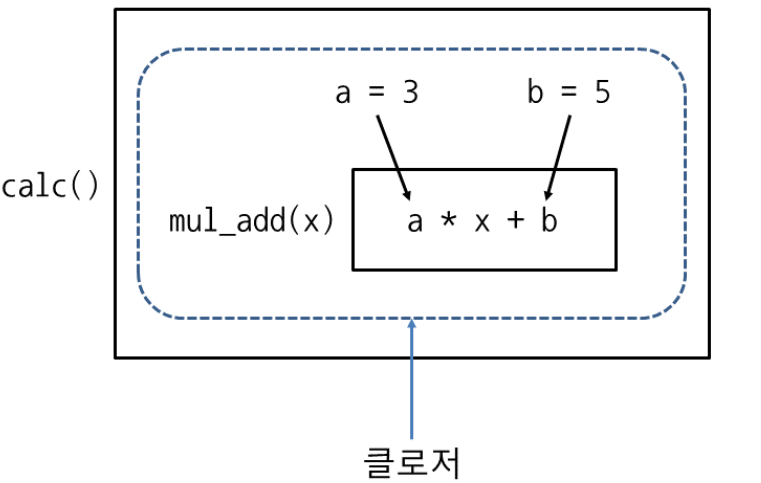

  * 이처럼 클로저를 사용하면 프로그램의 흐름을 변수에 저장할 수 있습니다. 
  * 즉, 클로저는 지역 변수와 코드를 묶어서 사용하고 싶을 때 활용합니다. 
  * 또한, 클로저에 속한 지역 변수는 바깥에서 직접 접근할 수 없으므로 데이터를 숨기고 싶을 때 사용합니다.

#### lambda로 클로저 만들기
  - 클로저는 다음과 같이 lambda로도 만들 수 있습니다.

In [203]:
def calc():
    a = 3
    b = 5
    return lambda x: a * x + b    # 람다 표현식을 반환(mul_add 함수 대체)
 
c = calc()
print(c(1), c(2), c(3), c(4), c(5))

8 11 14 17 20


  * return lambda x: a * x + b처럼 람다 표현식을 만든 뒤 람다 표현식 자체를 반환했습니다. 
  * 이렇게 람다를 사용하면 클로저를 좀 더 간단하게 만들 수 있습니다.
  * 보통 클로저는 람다 표현식과 함께 사용하는 경우가 많아 둘을 혼동하기 쉽습니다. 
  * 람다는 이름이 없는 익명 함수를 뜻하고<font color="red">(아주중요), 
  * 클로저는 함수를 둘러싼 환경을 유지했다가 나중에 다시 사용하는 함수를 뜻합니다.<font color="red">(아주중요)

#### 클로저의 지역 변수 변경하기
  - 지금까지 클로저의 지역 변수를 가져오기만 했는데, 
  - 클로저의 지역 변수를 변경하고 싶다면 nonlocal을 사용하면 됩니다. 
  - 다음은 a * x + b의 결과를 함수 calc의 지역 변수 total에 누적합니다.

In [206]:
def calc():
    a = 3
    b = 5
    total = 0
    
    def mul_add(x):
        nonlocal total  # 상위 calc 함수의 지역변수 사용 선언(0 ==> 8 ==> 19 순서로 값이 변경됨)
        total = total + a * x + b # 0 + 3*1 + 5 = 8, 8 + 3*2 + 5 = 19, 19 + 3*3 + 5 = 33
        print(total)
    return mul_add
 
c = calc()
c(1)
c(2)
c(3)

8
19
33


  * 지금까지 전역 변수, 지역 변수, 변수의 범위, 클로저에 대해 알아보았습니다. 
  * 클로저는 다소 어려운 개념이므로 지금 당장 완벽하게 이해하지 않아도 상관없습니다. 
  * 나중에 파이썬에 익숙해지면 자연스럽게 익히게 됩니다.
  * 이 함수의 클로져 개념을 이해하고 있어야 <font color="red">데코레이터라는 깔딱 고개를 무사히 넘어 갈수 있습니다. 

In [210]:
# 이것만을 기억하자.
def outer():
    x = 100          # 지역변수 x 선언
    def inner():
        print(x)     # 외부 함수의 지역변수 x를 기억하고 있다.
    return inner     # 외부 함수가 자신의 내부 함수를 호출시 함수명 만을 사용한다.(괄호 없음)

foo = outer()        # foo 변수에 inner 함수명을 할당한다.(first class citizen 원리)

#### [function clouse 정리]
  * foo는 inner를 리턴받았고, inner에서 사용하는 x는 inner 바깥의 outer에 있기 때문에 foo를 호출하는 시점에서는 x가 존재하지 않아야 합니다. 
  * 그런데, 위에서 보이듯이 잘 실행됩니다. 이게 바로 function closure입니다. 
  * 펑션 클로저는 그 함수가 정의될 때 자신을 감싸고 있는 namespace가 어떻게 생겼는지 기억한다는 의미입니다. 
  * 간단하게 말하면, 어떠한 함수를 객체로 받을 때 그 함수를 감싸는 scope의 변수들 또한 같이 가져간다는 의미입니다. 

#### 일급객체(first class object, citizen)란 무엇인가
  - 일급 객체란 다음 조건을 만족하는 객체를 말합니다.
    * 변수나 데이터 구조에 넣을 수 있다.
    * 함수의 매개변수에 전달 할 수 있어야 한다.
    * 반환값(return)으로 사용할 수 있어야 한다.
    
  - 특히 함수는 일급객체의 조건을 만족하면서 실행 중(run-time)에 함수를 생성할 수 있어야 합니다.
  - 파이썬에서는 def 안에서 def로 함수를 만들거나,
  - lambda를 사용하여 실행 중에 함수를 생성할 수 있으므로 파이썬의 함수는 일급 객체 또는 일급 시민입니다.

----
#### 데코레이터(장식자) 사용하기
----

  * 이제부터 파이썬의 백미인 데코레이터를 알아보도록 하겠습니다. 
  * 파이썬은 데코레이터(decorator)라는 기능을 제공합니다. 
  * 데코레이터는 장식하다, 꾸미다라는 뜻의 decorate에 유래하였습니다.
  * 클래스에서 메서드를 만들 때 @staticmethod, @classmethod 등을 붙여서 사용한 적이 있습니다. 
    - (이번주 과제에 다양한 사용 예시가 나옵니다.) 
  * 이렇게 @로 시작하는 것들이 데코레이터입니다.
  * 즉, 함수(클레스에서 메서드)를 장식한다고 해서 이런 이름이 붙었습니다.

In [10]:
class Calcurator:
    @staticmethod    # built-in 데코레이터
    def substract(a, b):
        print(a - b)
        
calc = Calcurator()
calc.substract(100, 10)

90


 - 이번 시간에는 데코레이터를 만들고 사용하는 방법을 알아보겠습니다.
 - 참고로 데코레이터는 우리말로 장식자라고 합니다.

----
#### 01. 데코레이터 만들기
  + 데코레이터는 함수를 장식한다고 했는데 도대체 어디에 사용하려고 만든 기능일까요. 
  + 데코레이터는 기존의 사용자 정의 함수를 수정하지 않은 상태에서 추가 기능을 구현할 때 사용합니다.<font color="red">(아주중요) 
  + 예를 들어서 기존의 함수에 "함수의 시작"과 "함수의 끝"을 프린트하고 싶다면 
  + 다음과 같이 기존의 함수의 시작, 끝 부분에 print를 넣어주어야 합니다.
----

In [12]:
def foo():
    print('foo 함수의 시작')    # 코드 추가
    print('foo')
    print('foo 함수의 끝')      # 코드 추가

def bar():
    print('bar 함수의 시작')    # 코드 추가
    print('bar')
    print('bar 함수의 끝')      # 코드 추가

foo()
bar()

foo 함수의 시작
foo
foo 함수의 끝
bar 함수의 시작
bar
bar 함수의 끝


  + 만약 다른 함수들도 시작과 끝을 출력하고 싶다면 
  + 함수를 만들 때마다 print를 넣어야 합니다. 
  + 따라서 이런 함수가 많아지면 매우 번거로워집니다.
  + 이런 경우에 데코레이터를 사용하면 아주 편리하겠지요. 
  + 다음은 "함수의 시작"과 "함수의 끝"을 출력하는 데코레이터입니다.

In [15]:
def deco(func):                               # 호출할 함수를 매개변수로 받음
    def wrapper():                            # 호출할 함수를 감싸는 함수
        print(func.__name__, '함수의 시작')    # __name__으로 함수 이름 출력
        func()                                # 매개변수로 받은 함수를 호출
        print(func.__name__, '함수의 끝')      # __name__으로 함수 이름 출력
    return wrapper                            # wrapper 함수 반환
 
def foo():
    print('foo')

def bar():
    print('bar')

deco_foo = deco(foo)       # 데코레이터에 호출할 함수명을 넣음
deco_foo()                 # 반환된 함수를 호출  ==> 함수()
deco_bar = deco(bar)       # 데코레이터에 호출할 함수명을 넣음
deco_bar()                 # 반환된 함수를 호출  ==> 함수()

foo 함수의 시작
foo
foo 함수의 끝
bar 함수의 시작
bar
bar 함수의 끝


  + foo와 bar 함수의 시작과 끝이 출력되었습니다. 
  + 먼저 데코레이터 deco는 호출할 함수를 매개변수로 받습니다.

  + 이제 wrapper 함수에서는 "함수의 시작"을 알리는 문자열을 출력하고, 
  + deco 함수에서 매개변수로 받은 func를 호출합니다. 
  + 그다음에 "함수의 끝"을 알리는 문자열을 출력합니다. 
  + 여기서 매개변수로 받은 함수의 원래 이름을 출력할 때는 \_\_name\_\_ 속성을 활용합니다. 
  + 마지막으로 wrapper 함수를 다 만들었으면 return을 사용하여 wrapper 함수 자체를 반환합니다.

In [18]:
def deco(func):                               # 호출할 함수명을 매개변수로 받음
    def wrapper():                            # 호출할 함수를 감싸는 함수
        print(func.__name__, '함수의 시작')    # __name__으로 함수 이름 출력
        func()                                # 매개변수로 받은 함수를 호출
        print(func.__name__, '함수의 끝')      # __name__으로 함수 이름 출력
    return wrapper                            # wrapper 함수명 반환

In [21]:
deco

<function __main__.deco(func)>

  + 즉, 함수 안에서 함수를 만들고 반환하는 클로저(closure)입니다.<font color="red">(아주 중요)
  + 데코레이터를 사용할 때는 deco 함수에 호출할 함수명만(여기서는 foo 또는 bar) 넣습니다. 
  + 그 다음에 데코레이터에서 반환된 함수(여기서는 wrapper)를 호출합니다. 
  + 이렇게 하면 데코레이터에 매개변수로 넣은 함수명(func.\_\_name\_\_)를 호출하고 
  + "함수의 시작"를 출력하고 func()함수를 호출하고  
  + 함수명(func.\_\_name\_\_)를 호출하고"함수의 끝"을 출력합니다.

In [22]:
deco_foo = deco(foo)       # 데코레이터에 호출할 함수명을 넣음
deco_foo()                 # 반환된 함수를 호출
deco_bar = deco(bar)       # 데코레이터에 호출할 함수명을 넣음
deco_bar()                 # 반환된 함수를 호출

foo 함수의 시작
foo
foo 함수의 끝
bar 함수의 시작
bar
bar 함수의 끝


----
#### 02. @로 데코레이터 사용하기
  * 이제 @을 사용하여 좀 더 간편하게 데코레이터를 지정해보겠습니다. 
  * 다음과 같이 호출할 함수 위에 @데코레이터 형식으로 지정합니다.<font color="red">(아주 중요)
```python
@데코레이터
def 함수이름():
    코드
```
----

In [1]:
def deco(func):                               # 호출할 함수를 매개변수로 받음
    def wrapper():                            # 호출할 함수를 감싸는 함수
        print(func.__name__, '함수의 시작')    # __name__으로 함수 이름 출력
        func()                                # 매개변수로 받은 함수를 호출
        print(func.__name__, '함수의 끝')      # __name__으로 함수 이름 출력
    return wrapper                            # wrapper 함수 반환

@deco            #decorator name deco
def foo():
    print('foo')

@deco            #decorator name deco
def bar():
    print('bar')

foo()
bar() # 함수를 호출

foo 함수의 시작
foo
foo 함수의 끝
bar 함수의 시작
bar
bar 함수의 끝


  * foo, bar 함수 위에 @deco를 붙인 뒤에 foo와 bar 함수를 그대로 호출하면 됩니다.
  * 물론, 다른 함수 위에 @deco를 붙인 뒤 함수를 호출하면 해당 함수의 시작과 끝을 출력할 수 있습니다.

In [2]:
@deco            #decorator
def foo():
    print('foo')

@deco            #decorator
def bar():
    print('bar')

foo()
bar()

foo 함수의 시작
foo
foo 함수의 끝
bar 함수의 시작
bar
bar 함수의 끝


  * 데코레이터는 함수를 감싸는 형태로 구성되어 있습니다. 
  * 따라서 데코레이터는 기존 함수를 수정하지 않으면서 추가 기능을 구현할 때 아주 유용합니다.

#### 데코레이터 여러개 지정하기
  * 함수에는 데코레이터를 여러 개 지정할 수 있습니다. 
  * 다음과 같이 함수 위에 데코레이터를 여러 줄로 지정해줍니다. 
  * 이때 데코레이터가 실행되는 순서는 위에서 아래 순입니다.(?)
```python
@데코레이터_01
@데코레이터_02
def 함수이름():
    코드
```

In [28]:
def decorator_01(func):
    def wrapper():
        print('decorator_01')
        func()
    return wrapper
 
def decorator_02(func):
    def wrapper():
        print('decorator_02')
        func()
    return wrapper
 
# 데코레이터를 여러 개 지정
@decorator_01
@decorator_02
def sayfoo():
    print('안녕하세요.')

sayfoo()

decorator_01
decorator_02
안녕하세요.


  * @을 사용하지 않았을 때는 다음 코드와 동작이 같습니다.

In [1]:
def decorator_01(func):
    def wrapper():
        print('decorator_01')
        func()
    return wrapper
 
def decorator_02(func):
    def wrapper():
        print('decorator_02')
        func()
    return wrapper
 
def sayfoo():            # sayfoo를 재정의해주어야 합니다.
    print('안녕하세요.')

decorated_sayfoo = decorator_01(decorator_02(sayfoo))
decorated_sayfoo()  # 결과가 상이 할수 있습니다.(sayfoo를 재정의해주어야 합니다.) 쥬피터 노트북의 셀 공유로 인해서 발생

decorator_01
decorator_02
안녕하세요.


  * 아마 놀랍지 않겠지만 한 함수에 데코레이터를 하나 이상 적용할 수 있음을 보았습니다.
  * 이렇게 하면 효과가 누적되므로 데코레이터를 재사용 가능한 빌딩 블록으로써 유용하게 활용활 수 있습니다.
  * 또 다른 예제로 파이썬이 데코레이터를 어떤 순서로 적용되는지 다시 자세히 살펴봅시다.

In [42]:
# 슬기로운 파이썬 트릭
def outer(func):
    def wrapper():
        return '<outer>' + func() + '</outer>'
    return wrapper

def inner(func):
    def wrapper():
        return '<inner>' + func() + '</inner>'
    return wrapper

In [38]:
# 실제 실행은 스택 개념이 적용되어 먼저 쌓은 데코레이터 부터  
@outer
@inner
def greeting():
    return "안녕하세요."

In [44]:
greeting()

'<outer><inner>안녕하세요.</inner></outer>'

  * 장식된 함수를 실행하면 데코레이터를 아래에서 위 순서로 적용했음을 명확하게 보여줍니다.
  * 아래에서 위로의 순서를 잘 기억하도록 돕기위해 데코레이터 쌓기로 기억하시면 좋겠습니다.<font color="red">(아주 중요)

----
#### 02. 매개변수와 반환값을 처리하는 데코레이터 만들기
  + 지금까지 매개변수와 반환값이 없는 함수의 데코레이터를 만들었습니다. 
  + 이번에는 매개변수와 반환값을 처리하는 데코레이터는 어떻게 만드는지 알아보겠습니다. 
  + 다음은 함수의 매개변수와 반환값을 출력하는 데코레이터입니다.
----

In [48]:
def decorator(func):      # 호출할 함수를 매개변수로 받음
    def wrapper(x, y):    # 호출할 함수 sbtract(x, y)의 매개변수와 똑같이 지정
        r = func(x, y)    # func에 매개변수 x, y를 넣어서 호출하고 반환값을 변수 r에 저장
        print(f'{func.__name__}(x={x}, y={y}) -> {r}')  # 매개변수와 반환값 출력
        return r          # func의 반환값을 반환
    return wrapper        # wrapper 함수 반환
 
@decorator                # @데코레이터
def subtract(x, y):       # 매개변수는 두 개
    return x - y          # 매개변수 두 개를 빼서 반환
 
subtract(100, 10)

subtract(x=100, y=10) -> 90


90

  + subtract 함수를 호출했을 때 데코레이터를 통해서 매개변수와 반환값이 출력되었습니다. 
  + 매개변수와 반환값을 처리하는 데코레이터를 만들 때는 먼저 안쪽 wrapper 함수의 매개변수를 
  + 호출할 함수 subtract(x, y)의 매개변수와 똑같이 2개(여기서는 x, y) 만들어 주어야 합니다.<font color="red">(아주 중요)

  + wrapper 함수 안에서는 func를 호출하고 반환값을 변수 r에 저장합니다. 
  + 그 다음에 print로 매개변수와 반환값을 출력합니다. 
  + 이때 func에는 매개변수 x와 y를 그대로 넣어줍니다. 
  + 또한, subtract 함수는 두 수를 빼서 반환해야 하므로 func의 반환값을 return으로 반환해줍니다.

  + 만약 wrapper 함수에서 func의 반환값을 반환하지 않으면 
  + subtract 함수를 호출해도 반환값이 나오지 않으므로 주의해야 합니다.<font color="red">(아주 중요) 
  + 참고로 wrapper 함수에서 func의 반환값을 출력할 필요가 없으면 
  + return func(x, y)처럼 func를 호출하면서 바로 반환해도 됩니다.
  + 데코레이터를 사용할 때는 @로 함수 위에 지정해주면 됩니다. 
  + 또한, @로 데코레이터를 사용했으므로 subtract 함수는 그대로 호출합니다.

#### 가변 인수 함수 데코레이터
  + def subtract(x, y):는 매개변수의 개수가 고정된 함수입니다. 
  + 그러면 매개변수(인수)가 고정되지 않은 함수는 어떻게 처리할까요? 
  + 이때는 wrapper 함수를 가변 인수 함수로 만들면 됩니다.

In [52]:
def decorator(func):                 # 호출할 함수를 매개변수로 받음
    def wrapper(*args, **kwargs):    # 가변 인수 함수로 만듦(args는 tuple로, kwargs는 dict으로 받음)
        r = func(*args, **kwargs)    # func에 args, kwargs를 언패킹하여 넣어줌
        print(f'{func.__name__}(args={args}, kwargs={kwargs}) -> {r}')
                                     # 매개변수와 반환값 출력
        return r                     # func의 반환값을 반환
    return wrapper                   # wrapper 함수 반환
 
@decorator               # @데코레이터
def get_max(*args):      # 위치 인수를 사용하는 가변 인수 함수
    return max(args)
 
@decorator               # @데코레이터
def get_min(**kwargs):   # 키워드 인수를 사용하는 가변 인수 함수
    return min(kwargs.values())

In [58]:
get_max(10, 20, 30, 40, 50)  

get_max(args=(10, 20, 30, 40, 50), kwargs={}) -> 50


50

In [54]:
get_min(x=10, y=20, z=30)

get_min(args=(), kwargs={'x': 10, 'y': 20, 'z': 30}) -> 10


10

  + get_max 함수와 get_min 함수는 가변 인수 함수입니다. 
  + 따라서 데코레이터도 가변 인수 함수로 만들어줍니다.<font color="red">(아주 중요) 
  + 이때 위치 인수와 키워드 인수를 모두 받을 수 있도록 \*args와 \*\*kwargs를 지정해줍니다.

  + wrapper 함수 안에서는 func를 호출해주는데 args는 튜플이고, 
  + kwargs는 딕셔너리이므로 func에 넣을 때는 언패킹하여 넣어줍니다. 
  + 그리고 print로 매개변수와 반환값을 출력합니다

In [55]:
def decorator(func):                 # 호출할 함수를 매개변수로 받음
    def wrapper(*args, **kwargs):    # 가변 인수 함수로 만듦
        r = func(*args, **kwargs)    # func에 args, kwargs를 언패킹하여 넣어줌
        print(f'{func.__name__}(args={args}, kwargs={kwargs}) -> {r}')
                                     # 매개변수와 반환값 출력
        return r                     # func의 반환값을 반환
    return wrapper                   # wrapper 함수 반환

  + 이렇게 만든 데코레이터 decorator는 위치 인수와 키워드 인수를 모두 처리할 수 있습니다. 
  + 따라서 가변 인수 함수뿐만 아니라 일반적인 함수에도 사용할 수 있습니다.

In [56]:
@decorator
def mul(a, b):
    return a + b

mul(10, 20)

mul(args=(10, 20), kwargs={}) -> 30


30

#### 메서드에 데코레이터 사용하기
  + 클래스를 만들면서 메서드에 데코레이터를 사용할 때는 self를 주의해야 합니다.<font color="red">(아주 중요) 
  + 인스턴스 메서드는 항상 self를 받으므로 데코레이터를 만들 때도 
  + wrapper 함수의 첫 번째 매개변수는 self로 지정해야 합니다(클래스 메서드는 cls). 
    - 이번 과제 예시에서 자세히 보여줍니다.
  + 마찬가지로 func를 호출할 때도 self와 매개변수를 그대로 넣어야 합니다.

In [62]:
def decorator(func):
    def wrapper(self, x, y):   # 호출할 함수가 인스턴스 메서드이므로 첫 번째 매개변수는 self로 지정
        r = func(self, x, y)   # self와 매개변수를 그대로 넣어줌
        print(f'{func.__name__}(x={x}, y={y}) -> {r}')  # 매개변수와 반환값 출력
        return r               # func의 반환값을 반환
    return wrapper
 
class Calcurator:
    @decorator
    def subtract(self, x, y):    # subtract는 인스턴스 메서드
        return x - y

calc = Calcurator()
print(calc.subtract(100, 10))

subtract(x=100, y=10) -> 90
90


----
#### 03. 매개변수가 있는 데코레이터 만들기
  - 이번에는 매개변수가 있는 데코레이터를 만들어보겠습니다. 
  - 이런 방식의 데코레이터는 값을 지정해서 동작을 바꿀 수 있습니다.<font color="red">(아주 중요) 
  - 다음은 함수의 반환값이 특정 수의 배수인지 확인하는 데코레이터입니다.
----

In [70]:
def is_x_multiple(x):            # 데코레이터가 사용할 매개변수를 지정
    def real_decorator(func):    # 호출할 함수명을 매개변수로 받음
        def wrapper(a, b):       # 호출할 함수의 매개변수와 똑같이 지정
            r = func(a, b)       # func를 호출하고 반환값을 변수에 저장
            if r % x == 0:       # func의 반환값이 x의 배수인지 확인
                print(f'{func.__name__}의 반환값은 {x}의 배수입니다.')
            else:
                print(f'{func.__name__}의 반환값은 {x}의 배수가 아님니다.')
            return r             # func의 반환값을 반환
        return wrapper           # wrapper 함수 반환
    return real_decorator        # real_decorator 함수 반환
 
@is_x_multiple(3)     # @데코레이터(인수)
def add(a, b):
    return a + b
 
print(add(15, 45))
print(add(20, 15))

add의 반환값은 3의 배수입니다.
60
add의 반환값은 3의 배수가 아님니다.
35


  + 실행을 해보면 add 함수의 반환값이 3의 배수인지 아닌지 알려줍니다
  + 지금까지 데코레이터를 만들 때 함수 안에 함수를 하나만 만들었습니다. 
  + 하지만 매개변수가 있는 데코레이터를 만들 때는 함수를 하나 더 만들어야 합니다.<font color="red">(아주 중요)
  + 먼저 is_x_multiple 함수를 만들고 데코레이터가 사용할 매개변수 x를 지정합니다. 
  + 그리고 is_x_multiple 함수 안에서 실제 데코레이터 역할을 하는 real_decorator를 만듭니다. 
  + 즉, 이 함수에서 호출할 함수를 매개변수로 받습니다. 
  + 그 다음에 real_decorator 함수 안에서 wrapper 함수를 만들어주면 됩니다.(복잡하죠-_-;;)

  + wrapper 함수 안에서는 먼저 func함수의 수행 결과가 데코레이터 매개변수 x의 배수인지 확인합니다. 
  + 그다음에 func함수의 반환값을 반환합니다.

  - 여기서는 real_decorator, wrapper 함수를 두 개 만들었으므로 
  - 함수를 만든 뒤에 return으로 두 함수를 반환해줍니다.

  + 데코레이터를 사용할 때는 데코레이터에 ( )(괄호)를 붙인 뒤 인수를 넣어주어야 합니다.
```python
@데코레이터(인수)
def 함수이름():
    코드
```

In [71]:
@is_x_multiple(3)     # @데코레이터(인수)
def add(a, b):
    return a + b

  + 여기서는 is_x_multiple에 3을 지정해서 add 함수의 반환값이 3의 배수인지 확인했습니다. 
  + 물론 is_x_multiple에 다른 숫자를 넣으면 함수의 반환값이 해당 숫자의 배수인지 확인해줍니다.

#### 매개변수가 있는 데코레이터를 여러 개 지정하기
  * 매개변수가 있는 데코레이터를 여러 개 지정할 때는 
  * 다음과 같이 인수를 넣은 데코레이터를 여러 줄로 지정해줍니다.
```python
@데코레이터_01(인수)
@데코레이터_02(인수)
def 함수이름():
    코드
```

In [75]:
@is_x_multiple(2) # 마지막으로 수행
@is_x_multiple(3) # 그 다음 수행
@is_x_multiple(5) # 제일 먼저 수행
def add(a, b):
    return a + b
 
add(10, 20)

add의 반환값은 5의 배수입니다.
wrapper의 반환값은 3의 배수입니다.
wrapper의 반환값은 2의 배수입니다.


30

#### 원래 함수 이름이 안나온다면?
  - 데코레이터를 여러 개 사용하면 데코레이터에서 
  - 반환된 wrapper 함수가 다른 데코레이터로 들어갑니다. 
  - 따라서 함수의 __name__을 출력해보면 wrapper가 나옵니다.

  + 함수의 원래 이름을 출력하고 싶다면 functools 모듈의 wraps 데코레이터를 사용해야 합니다. 
  + 다음과 같이 @functools.wraps에 func를 넣은 뒤 wrapper 함수 위에 지정해줍니다
  + (from functools import wraps로 데코레이터를 가져왔다면 @wraps(func)를 지정).

In [80]:
import functools
functools?
#functools??

Type:        module
String form: <module 'functools' from 'C:\\Users\\KOSAF\\anaconda3\\lib\\functools.py'>
File:        c:\users\kosaf\anaconda3\lib\functools.py
Docstring:   functools.py - Tools for working with functions and callable objects


In [85]:
functools.wraps?

Signature:
functools.wraps(
    wrapped,
    assigned=('__module__', '__name__', '__qualname__', '__doc__', '__annotations__'),
    updated=('__dict__',),
)
Docstring:
Decorator factory to apply update_wrapper() to a wrapper function

Returns a decorator that invokes update_wrapper() with the decorated
function as the wrapper argument and the arguments to wraps() as the
remaining arguments. Default arguments are as for update_wrapper().
This is a convenience function to simplify applying partial() to
update_wrapper().
File:      c:\users\kosaf\anaconda3\lib\functools.py
Type:      function


In [83]:
import functools
 
def is_x_multiple(x):
    def real_decorator(func):
        @functools.wraps(func)    # @functools.wraps에 func를 넣은 뒤 wrapper 함수 위에 지정
        def wrapper(a, b):
            r = func(a, b)
            if r % x == 0:
                print(f'{func.__name__}의 반환값은 {x}의 배수입니다.')
            else:
                print(f'{func.__name__}의 반환값은 {x}의 배수가 아닙니다.')
            return r
        return wrapper
    return real_decorator

@is_x_multiple(2)  # 3rd exec
@is_x_multiple(3)  # 2nd exec
@is_x_multiple(7)  # 1st exec
def add(a, b):
    return a + b
 
add(10, 20)

add의 반환값은 7의 배수가 아닙니다.
add의 반환값은 3의 배수입니다.
add의 반환값은 2의 배수입니다.


30

  + @functools.wraps는 원래 함수의 정보를 유지시켜줍니다. 
  + 따라서 디버깅을 할 때 유용하므로 데코레이터를 만들 때는 
  + @functools.wraps를 사용하는 것이 좋습니다(너무 머리가 아프죠-_-;;).
```python
@functools.wraps(func) 
```

----
#### 04. 클래스로 데코레이터 만들기
  - 이번에는 클래스로 데코레이터를 만드는 방법을 알아보겠습니다. 
  - 특히, 클래스를 활용할 때는 인스턴스를 함수처럼 호출하게 해주는 
  - \_\_call\_\_ 메서드를 구현해야 합니다.<font color="red">(아주 중요)
    - 이번 과제 예시에서도 보여줍니다.
  - 다음은 함수의 시작과 끝을 출력하는 데코레이터입니다.
----

In [102]:
class Decorator:

    def __init__(self, func):    # 호출할 함수명을 인스턴스의 초깃값으로 받음
        self.func = func         # 호출할 함수명을 속성 self.func에 저장
         
    def __call__(self):
        print(self.func.__name__, '함수의 시작')    # __name__으로 함수 이름 출력
        self.func()                                # 속성 self.func에 저장된 함수를 호출()
        print(self.func.__name__, '함수의 끝')

@Decorator    # @데코레이터
def sayfoo():
    print('안녕하세요.')

sayfoo()    # 함수를 그대로 호출

sayfoo 함수의 시작
안녕하세요.
sayfoo 함수의 끝


  * 클래스로 데코레이터를 만들 때는 먼저 \_\_init\_\_ 메서드를 만들고 호출할 함수를 초깃값으로 받습니다. 
  * 그리고 매개변수로 받은 함수명를 속성으로 저장합니다.

In [ ]:
class Decorator:

    def __init__(self, func):    # 호출할 함수를 인스턴스의 초깃값으로 받음
        self.func = func         # 호출할 함수명을 속성 self.func에 저장

  * 이제 인스턴스를 호출할 수 있도록 \_\_call\_\_ 메서드를 만듭니다. 
  * \_\_call\_\_ 메서드에서는 "함수의 시작"을 알리는 문자열을 출력하고, 
  * 속성 func에 저장된 함수를 호출합니다. 
  * 그 다음에 "함수의 끝"을 알리는 문자열을 출력합니다.

In [ ]:
    def __call__(self):
        print(self.func.__name__, '함수의 시작')    # __name__으로 함수 이름 출력
        self.func()                                # 속성 func에 저장된 함수를 호출
        print(self.func.__name__, '함수의 끝')

  * 데코레이터를 사용하는 방법은 클로저 형태의 데코레이터와 같습니다. 
  * 호출할 함수 위에 @을 붙이고 데코레이터를 지정하면 됩니다.
```python
@데코레이터
def 함수이름():
    코드
```

In [ ]:
@Decorator    # @데코레이터
def sayfoo():
    print('안녕하세요.')

  * @으로 데코레이터를 지정했으므로 함수는 그대로 호출해줍니다.

In [103]:
sayfoo()    # 함수를 그대로 호출

sayfoo 함수의 시작
안녕하세요.
sayfoo 함수의 끝


  * 참고로 클래스로 만든 데코레이터는 @을 지정하지 않고, 
  * 데코레이터의 반환값을 호출하는 방식으로도 사용할 수 있습니다. 
  * 다음과 같이 데코레이터에 호출할 함수을 넣어서 인스턴스를 생성한 뒤 인스턴스를 호출해주면 됩니다. 
  * 즉, 클래스에 \_\_call\_\_ 메서드를 정의했으므로 함수처럼 ( )(괄호)를 붙여서 호출할 수 있습니다.<font color="red">(아주 중요)

In [104]:
def sayfoo():                      # @데코레이터를 지정하지 않음
    print('안녕하세요.')

deco_sayfoo = Decorator(sayfoo)    # 데코레이터에 호출할 함수를 넣어서 인스턴스 생성
deco_sayfoo()                      # 인스턴스를 호출. __call__ 메서드가 호출됨

sayfoo 함수의 시작
안녕하세요.
sayfoo 함수의 끝


----
#### 05. 클래스로 매개변수와 반환값을 처리하는 데코레이터 만들기
  + 지금까지 클래스로 데코레이터를 만들어보았습니다. 
  + 클래스로 만든 데코레이터도 매개변수와 반환값을 처리할 수 있습니다. 
  + 다음은 함수의 매개변수를 출력하는 데코레이터입니다.
  + (여기서는 위치 인수와 키워드 인수를 모두 처리하는 가변 인수의 예로 설명).
----

In [107]:
class Decorator:
    def __init__(self, func):    # 호출할 함수를 인스턴스의 초깃값으로 받음
        self.func = func         # 호출할 함수를 속성 func에 저장
 
    def __call__(self, *args, **kwargs):    # 호출할 함수의 매개변수를 처리
        r = self.func(*args, **kwargs)      # self.func에 매개변수를 넣어서 호출하고 반환값을 변수에 저장
        print(f'{self.func.__name__}(args={args}, kwargs={kwargs}) -> {r}')
                                            # 매개변수와 반환값 출력
        return r                            # self.func의 반환값을 반환

@Decorator    # @데코레이터
def subtract(x, y):
    return x - y
 
print(subtract(100, 20))
subtract(x=100, y=20)

subtract(args=(100, 20), kwargs={}) -> 80
80
subtract(args=(), kwargs={'x': 100, 'y': 20}) -> 80


80

  * 클래스로 매개변수와 반환값을 처리하는 데코레이터를 만들 때는 
  * \_\_call\_\_ 메서드에 매개변수를 지정하고, 
  * self.func에 매개변수를 넣어서 호출한 뒤에 반환값을 반환해주면 됩니다. 
  * 여기서는 매개변수를 \*args, \*\*kwargs로 지정했으므로 self.func에 넣을 때는 언패킹하여 넣어줍니다.

In [ ]:
    def __call__(self, *args, **kwargs):    # 호출할 함수의 매개변수를 처리
        r = self.func(*args, **kwargs)      # self.func에 매개변수를 넣어서 호출하고 반환값을 변수에 저장
        print(f'{self.func.__name__}(args={args}, kwargs={kwargs}) -> {r}')
                                            # 매개변수와 반환값 출력
        return r                            # self.func의 반환값을 반환

  * 물론 가변 인수를 사용하지 않고, 고정된 매개변수를 사용할 때는 
  * 다음처럼 만들어도 됩니다.
```python
def __call__(self, x, y):
```

##### 클래스로 매개변수가 있는 데코레이터 만들기
  * 마지막으로 매개변수가 있는 데코레이터를 만들기입니다. 
  * 다음은 함수의 반환값이 특정 수의 배수인지 확인하는 데코레이터입니다.

In [111]:
class Is_x_multiple:
    def __init__(self, x):         # 데코레이터가 사용할 매개변수를 초깃값으로 받음
        self.x = x                 # 매개변수를 self.x에 저장
 
    def __call__(self, func):      # 호출할 함수를 매개변수로 받음
        def wrapper(a, b):         # 호출할 함수의 매개변수와 똑같이 지정(가변 인수로 작성해도 됨)
            r = func(a, b)         # func를 호출하고 반환값을 변수에 저장
            if r % self.x == 0:    # func의 반환값이 self.x의 배수인지 확인
                print(f'{func.__name__}의 반환값은 {self.x}의 배수입니다.')
            else:
                print(f'{func.__name__}의 반환값은 {self.x}의 배수가 아닙니다.')
            return r               # func의 반환값을 반환
        return wrapper             # wrapper 함수 반환

@Is_x_multiple(3)    # 데코레이터(인수)
def subtract(a, b):
    return a - b
 
print(subtract(100, 10))
print(subtract(200, 150))

subtract의 반환값은 3의 배수입니다.
90
subtract의 반환값은 3의 배수가 아닙니다.
50


  * 먼저 \_\_init\_\_ 메서드에서 데코레이터가 사용할 매개변수를 초기값으로 받습니다. 
  * 그리고 매개변수를 \_\_call\_\_ 메서드에서 사용할 수 있도록 속성에 저장합니다.

In [ ]:
    def __init__(self, x):         # 데코레이터가 사용할 매개변수를 초깃값으로 받음
        self.x = x                 # 매개변수를 속성 self.x에 저장

  * 지금까지 \_\_init\_\_에서 호출할 함수를 매개변수로 받았는데 
  * 여기서는 데코레이터가 사용할 매개변수를 받는다는 점 꼭 기억해두세요.<font color="red">(아주 중요)
  * 이제 \_\_call\_\_ 메서드에서는 호출할 함수를 매개변수로 받습니다. 
  * 그리고 \_\_call\_\_ 메서드 안에서 wrapper 함수를 만들어줍니다. 
  * 이때 wrapper 함수의 매개변수는 호출할 함수의 매개변수와 똑같이 지정해줍니다.
  * (앞의 예제처럼 가변 인수로 작성해도 됨).

In [ ]:
    def __call__(self, func):      # 호출할 함수를 매개변수로 받음
        def wrapper(a, b):         # 호출할 함수의 매개변수와 똑같이 지정(가변 인수로 작성해도 됨)

  * wrapper 함수 안에서는 func의 반환값이 데코레이터 매개변수 x의 배수인지 확인합니다. 
  * 이때 데코레이터 매개변수 x는 속성에 저장되어 있으므로 self.x와 같이 사용해야 합니다. 
  * 그리고 배수 확인이 끝났으면 func의 반환값을 반환합니다. 
  * 마지막으로 wrapper 함수를 다 만들었으면 return으로 wrapper 함수를 반환합니다.

In [ ]:
    def __call__(self, func):      # 호출할 함수를 매개변수로 받음
        def wrapper(a, b):         # 호출할 함수의 매개변수와 똑같이 지정(가변 인수로 작성해도 됨)
            r = func(a, b)         # func를 호출하고 반환값을 변수에 저장
            if r % self.x == 0:    # func의 반환값이 self.x의 배수인지 확인
                print(f'{func.__name__}의 반환값은 {self.x}의 배수입니다.')
            else:
                print(f'{func.__name__}의 반환값은 {self.x}의 배수가 아닙니다.')
            return r               # func의 반환값을 반환
        return wrapper             # wrapper 함수 반환

  * 데코레이터를 사용할 때는 데코레이터에 ( )(괄호)를 붙인 뒤 인수를 넣어주면 됩니다.
```python
@데코레이터(인수)
def 함수이름():
    코드
```

In [112]:
@Is_x_multiple(3)    # 데코레이터(인수)
def subtract(a, b):
    return a - b

  * 지금까지 데코레이터를 사용하는 방법을 배웠는데 문법이 조금 복잡했습니다. 
  * 여기서는 데코레이터가 기존 함수를 수정하지 않으면서 
  * 추가 기능을 구현할 때 사용한다는 점만 기억하면 됩니다. 
  * 보통 데코레이터는 프로그램의 버그를 찾는 디버깅, 
  * 함수의 성능 측정, 함수 실행 전에 데이터 확인 등에 활용합니다
  * (앞에서 만든 함수의 시작과 끝을 출력하는 데코레이터, 
  * 매개변수와 반환값을 출력하는 데코레이터는 디버깅에 활용할 수 있습니다. 

----
#### 고생하셨습니다.
  - 사실 파이썬을 처음 접하는 분들에게 클로져와 데코레이터는 쉽게 이해가 되는 개념은 아니지만
  - 이 개념을 도입함으로 인해 파이썬이 널리 퍼지게 된 것도 주지할 만합니다.
  - 노트북도 이제 10주 이상 사용해 보았으니 여러분도 자신 만의 복습 카드로 노트북을 적극 활용하시기 바랍니다.
  - 크롬 브라우저에서 파이썬 개발 환경으로써의 노트북은 처음 배우시는 분들에게는 
  - 자신의 코드 조각(snippet)을 각 셀에서 구현하고 돌려보고 마크다운으로 주석을 달아 나중에 
  - 살아있는 노트북으로 만들어 갈 수 있고 또 잘 만들면 친구들에게 자랑도 할 수 있겠지요.
  - 암튼, 산에 오르다보면 한 번 쯤은 깔딱 고개를 만난 다고 생각하시고 도전하시길 바랍니다.
  - 모두에서 말씀드렸지만 프로그램을 배우는 길은 오직 이해하고 오직 연습하는 길이 왕도입니다.
  - 감사합니다.
----